**MIT Engenharia de Dados: Big Data**
---

**Disciplina: Infraestrutura Kafka**

---

**Professor: Leandro Maia Gonçalves**

---

**Aluno: Felipe Moreira**

###Escolha 5 conceitos fundamentais sobre o Apache Kafka e os descreva.###
**Broker** - O Message Broker é o principal componente do Apache Kafka, ele funciona como um orquestrador das mensagens que são recebidas e consumidas na outra ponta. É possível pensar no Message Broker como uma grande caixa de correio, em que de um lado um usuário deposita uma mensagem e do outro alguém recolhe essa mensagem. Apesar de ser definida assim, o Broker é na verdade dividido em Tópicos nos quais efetivamente acontece o armazenamento e o acesso por parte dos clientes. Enquanto uma determinada mensagem encontra-se no broker ele garantirá o controle de versão, e a otimização a fim de que tanto a escrita quanto o processamento pelo consumidor sejam o mais eficientes possível.

**Queue** - A queue é a fila de mensagens recebidas pelo tópico a espera da leitura pelo consumidor. Ela é organizada de forma que tudo que tenha entrado esteja organizado por um índice e que esse índice seja atualizado e salvo quando o consumidor faz a leitura das mensagens.

**Offset** - Offset é o índice que cada partição do tópico possui afim de garantir que uma mesma mensagem não seja lida duas vezes pelo mesmo consumidor. Caso eu envie dez mensagens hoje e ainda hoje o consumidor leia as 10 ele terá o offset para o tópico em 10. Se amanhã outras 10 mensagens forem enviadas, ele pode iniciar a leitura a partir do índice 10, sem repetições.

**Producer** - É o componente que escreve dados no tópico de um Broker Kafka. Caso eu tenha uma informação de log de sistema e queira escrevê-lo em um tópico Kafka, eu o faria através de uma API de um produtor Kafka.

**Consumer**- É o componente que lê dados no tópico de um Broker Kafka. Caso eu queira uma informação escrita em um tópico Kafka, eu o faria a leitura através de uma API de um consumidor Kafka.


###Descreva como é a arquitetura do Apache Kafka###
A arquitetura do Apache Kafka tem como base o Message Broker, que é o repositório de dados e de controle de consulta desses mesmos dados. Esse Message Broker é particionado em um cluster de máquinas que por sua vez é gerenciado pelo Zookeeper. Esse cluster é responsável pelo armazenamento dos dados em filas de informações (queues) divididas em tópicos criados pelo usuário. As informações são inseridas nos tópicos e consequentemente no broker pelo Producer e são lidas pelo Consumer que são API’s do Apache Kafka que possibilitam a gestão, entrada e saída de dados. Um outro componente do Apache Kafka é o Kafka Connect que é um pacote de usos pré-definidos das aplicações Producer e Consumer. Através dele é possível informar os parâmetros de conexão e já ter um caminho de integração com determinadas tecnologias.


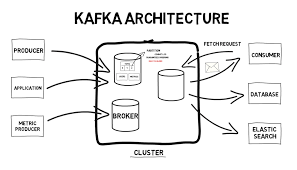

###Apresente exemplos de utilização do Apache Kafka em bases NoSQL e SQL###
Um excelente exemplo de uso para bases bases estruturadas ou SQL é a validação da última versão da informação. O que costuma ser um desafio para sistemas que lidam com atualizações constantes, por exemplo de cadastros. É sempre possível incluir um change data capture no seu sistema originário afim de conseguir filtrar os dados por data de atualização, no entanto essa é uma complexidade a mais de se gerenciar quanto a fidelidade do dado. Uma boa alternativa é utilizar os offsets do Kafka como o gerenciador de versões por dado enviado, como no exemplo abaixo. Dessa forma, quando um dado é consumido de um tópico Kafka, a partir da variação de offsets para uma mesma chave é possível validar qual a última versão do dado e alimentar o controle de uma CDC no banco de dados.

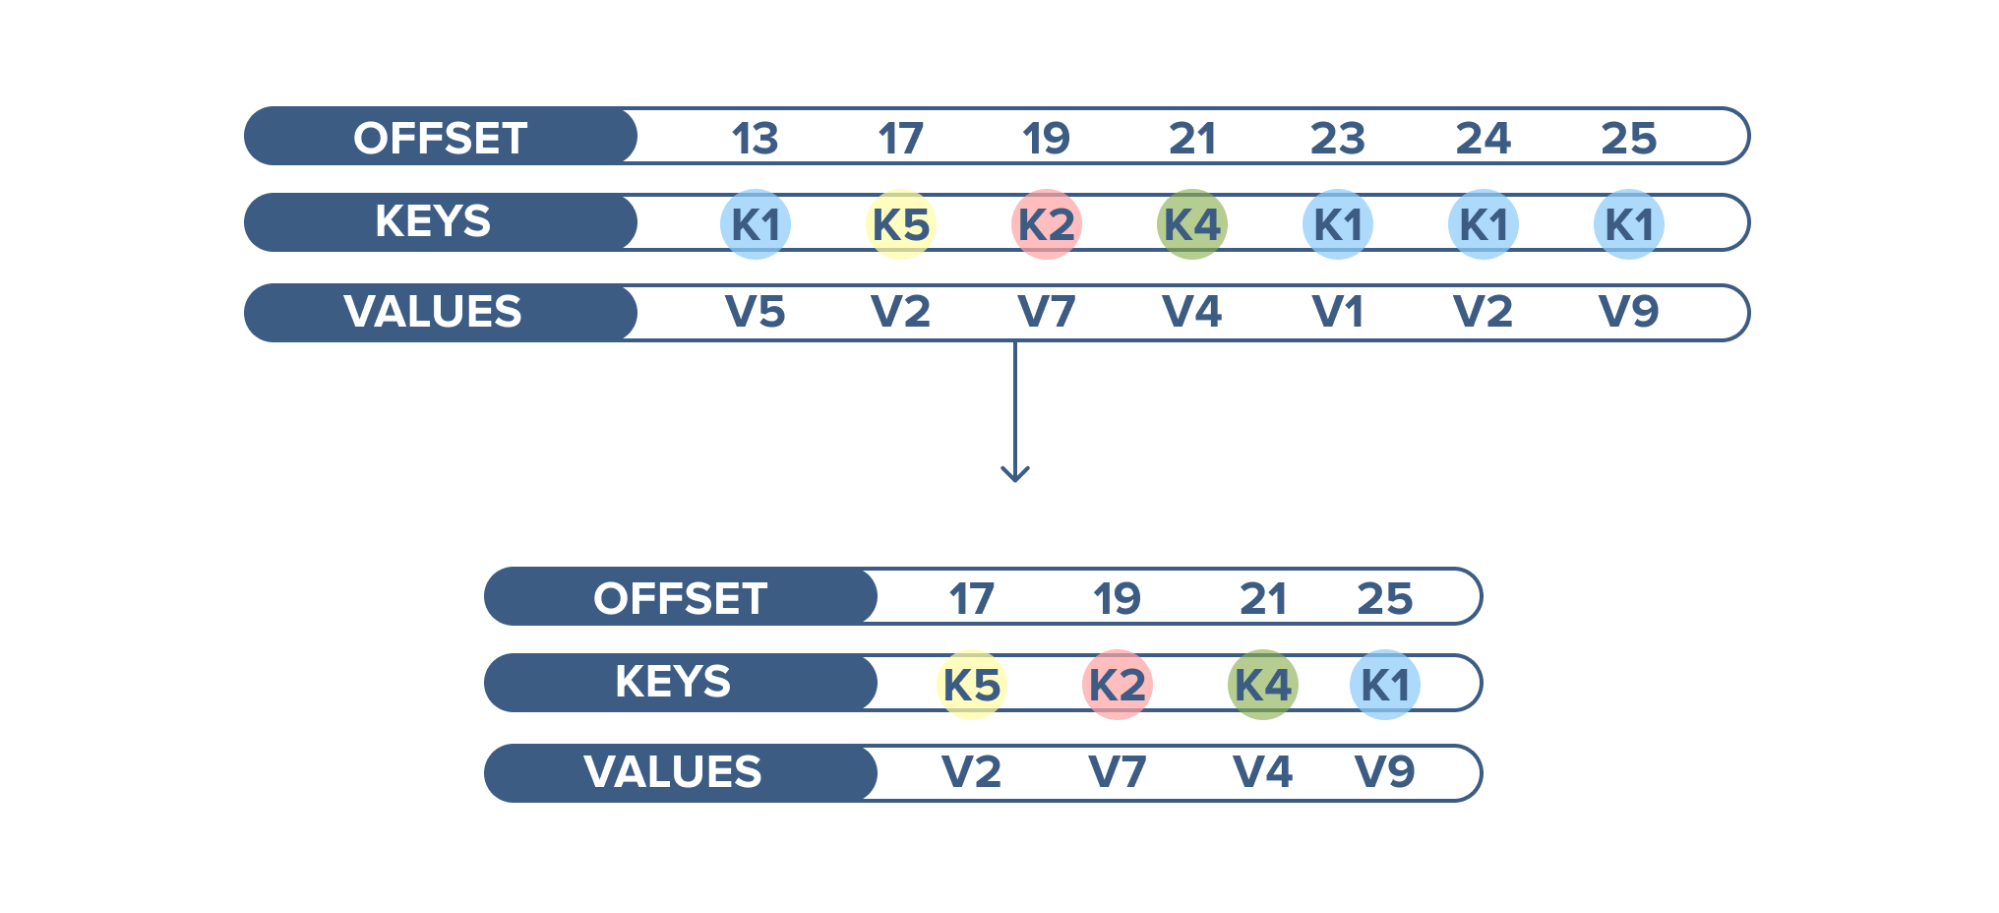

Já para um cenário NoSQL, com a possibilidade de que o dado armazenado em um tópico Kafka seja um Json, é possível também guardar informações de diferentes fontes de dados, sem que isso tenha que obrigatoriamente alterar o seu schema. Um exemplo, imagine que todas as visitas de um cliente em um e-commerce sejam registradas em um tópico em que o código do cliente é a chave. Com o formato Json eu posso armazenar informações de categorias diferentes afim de fazer recomendações para esse cliente sem onerar o banco de dados. Ex: caso ele visualize botas de obra o schema terá o tamanho e a cor, caso ele visualize furadeiras, a voltagem e a potência. Apesar de serem artigos distintos, é possível agrupá-los pela categoria “Obra” e assim fazer mais recomendações nessa mesma categoria. 

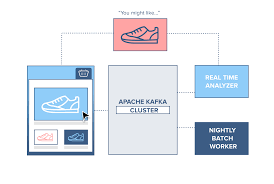


###Descrevas os principais benefícios em utilizar o Apache Kafka###
O Apache Kafka é um dos grandes impulsionadores da adoção da arquitetura por eventos. A arquitetura em si possui diversos benefícios como por exemplo a não dependência de que o sistema produtor de dados esteja sempre disponível (Por exemplo se uma rotina consulta dados de uma API e o sistema cai, todas as dependências dessa consulta poderiam cair também), no entanto o Kafka em si possui otimizações que fazem com que o seu uso seja o mais rápido tanto na escrita quanto na leitura. Isso porque os dados no broker são particionados em um cluster de máquinas, e assim como no HDFS, isso possibilita o armazenamento e consulta de um grande volume de informações. Além disso, o Broker também possui fator de replicação do dado, garantindo maior segurança de que as informações que transitam pela message queue estarão disponíveis mesmo que haja a queda de uma das máquinas do cluster. Por fim, por não salvar cópias das informações no kernel das máquinas que compõem o cluster (zero copy principle) a escrita e a consulta do dado são feitas de forma muito rápida possibilitando a transmissão de dados em streaming.


###O que é um pipeline de dados?###
Um pipeline de dados é toda sequência de comandos que constroem o caminho dos dados até sua disponibilização. Compreende a captura desse dado de sistemas produtivos ou externos, o processamento desse dado afim de que possam ser cruzados com outras informações de forma consistente (sem registros nulos ou de mesma chave), o armazenamento desse dado em formatos de maior performance como data warehouses ou data lakehouses e a sua disponibilização para uso seja em análises pontuais ou em produtos de dados como dashboards, algoritmos de ciência de dados, etc…
Abaixo é possível ver um exemplo de um pipeline de dados que se utiliza de diversas ferramentas na nuvem do Google Cloud para capturar, processar e armazenar dados até sua disponibilização.

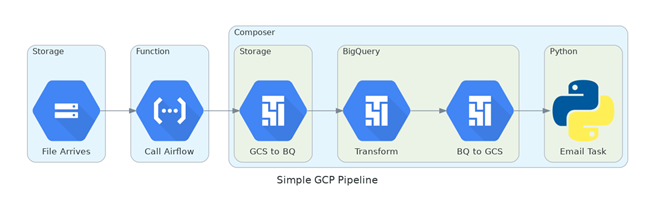


##Dê 2 (dois) exemplos de aplicações onde os pipelines de dados são utilizados em seu dia-a-dia##

Trabalho em uma empresa que concede empréstimos a usuários de um aplicativo. Toda a movimentação de informações até a resposta para a solicitação do cliente é feita por um pipeline de dados. Em um primeiro momento nós extraímos dados de birôs de informações como Serasa, SPC e mesmo instituições de combate ao terrorismo e lavagem de dinheiro como a Interpol. Na sequência esses dados são tratados de forma que possam ser cruzados entre si, nessa etapa um mesmo registro na tabela A deve ter sua correspondência clara na tabela B por exemplo, e não devem haver duplicidade entre as tabelas. Por fim, os dados são cruzados e um grande repositório de informações sobre os clientes é formado, esse é o repositório consultado pela aplicação de solicitação de empréstimos.

Um segundo exemplo é o de um email que recebi recentemente, dizendo que já faziam 30 dias que não comprava em uma determinada loja online e que havia portanto uma oferta para mim. Refletindo sobre, pude compreender que para receber aquele email, foi realizada primeiramente uma extração da base de compras, um agrupamento cliente a cliente pela data máxima das compras e por fim um gatilho com a condicional de que a data máxima fosse de 30 dias foi disparado. O que também representa um pipeline de dados, com extração, tratamento, provavelmente a entrada em uma ferramenta de CRM e uso através do gatilho. 


##Selecione uma base de dados pública brasileira para utilizar neste exercício. Você pode baixá-la em algum formato que desejar (ex.: formato .csv). Informe onde e como você conseguiu os seus dados. Explique se são estruturados ou não estruturados. Cada linha/registro em seu banco de dados corresponde a quais informações? Cada registro possui quantas colunas associadas e quais atributos elas representam? Qual o tamanho do banco de dados escolhido?##

Para essa análise, utilizaremos a base de dados da Secretaria de Educação de São Paulo, a SEDUC-SP, que anualmente realiza um desafio de dados com o intuito de compreender quais são os fatores que melhor contribuem para o melhor rendimento escolar. Para tanto, uma série de bases de dados anonimizadas foi dispnibilizada no Portal de Dados Abertos, com o intuito de responder à seguinte pergunta: "Quais as características da gestão escolar que impactam positivamente no rendimento dos estudantes no SARESP(Sistema de Avaliação de Rendimento Escolar do Estado de São Paulo)?"*
Os dados foram disponibilizados em arquivos CSV com estruturas distintas de acordo com o tema. Abaixo estarão descritos os atributos e volume de cada um dos datasets disponíveis por temática.


##### Dicionário de dados

Foram disponibilizadas algumas bases de dados e abaixo estarão descritas o que aquelas que serão utilizadas na análise contém, todas elas podem ser encontradas em https://dados.educacao.sp.gov.br/search/type/dataset:


1.   Formação por servidor = Formação funcionários anonimizado (novembro 2018 abril e novembro 2019), dentre as opções estão o grau de escolaridade funcionário a funcionário. Portanto se um determinado servidor possuir mestrado, doutorado ou bacharelado essa informação estará contida nessa base


2.   Ausências por servidor = Ausências funcionários ativos anonimizado. Aqui é possível verificar funcionário a funcionário se ele teve faltas, mesmo que justificadas no período de análise.


3.   Carga Horária por Docente = Carga horária anonimizado docentes ativos. Base com as informações das horas trabalhadas por docente. 


4.   Proeficiência SARESP por escola = O Sistema de Avaliação de Rendimento Escolar do Estado de São Paulo (SARESP) é uma avaliação anual aplicada pela Secretaria da Educação do Estado de São Paulo com a finalidade de diagnosticar e acompanhar a evolução da educação básica paulista. Aqui estarão as notas em português, matemática e ciências para o ensino médio.






#### Metodologia
  Como mencionado, para essa atividades, foram selecionadas 3 datasets que serão a base de estudo para a análise em Big Data : **Ausências, Formação e Carga Horária**. A ideia é entender de forma geral se as escolas que possuem as maiores médias de Carga Horária são também as escolas com maior nota no Saresp, se as escolas com os funcionários de maior formação são as escola com maior nota e por fim se as escolas com menor ausência estão entre as escolas que melhor performam e por fim almeja-se entender qual desses é o mais relevante nas escolas de melhor média no SARESP.


As bases podem ser encontradas no Drive: https://drive.google.com/drive/folders/1hDsD3NX95bz3iTzRFQ29LZoZ6hpofyQr?usp=sharing 


##Formule pelo menos 2 perguntas sobre sua base de dados. O que você quer saber sobre os dados que escolheu?##



1.   Após o cruzamento dos dados de desempenho médio por escola no SARESP com dados de Ausências dos docentes, é possível dizer que as escolas com menores índices de ausências possuem as maiores notas?
2.   Após o cruzamento dos dados de desempenho médio por escola no SARESP com dados de Carga Horária por escola, é possível dizer que as escolas com maiores cargas horárias possuem as maiores notas?
1.   Após o cruzamento dos dados de desempenho médio por escola no SARESP com dados de Formação Escolar dos docentes agrupados por escola, é possível dizer que as escolas cuja a média de anos de formação dos docentes é maior, possuem as maiores notas?









##Formule uma hipótese sobre o que você acha que vai encontrar quando filtrar e analisar seus dados ##
A hipótese a ser testada pela análise de dados, é de que apesar de haver uma lógica permeando todas as perguntas acima, é capaz que apenas a formação do servidor possua uma clara correlação com o desempenho do aluno no exame do Saresp. Sendo a hipótese de que investir em formação dos servidores é a chave de maior aprendizado dos alunos da rede pública.


### Etapa 1 da Anapalise de Dados e Pré-tratamento

In [1]:
#Instalção do Pyspark para processamento de dados
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 25.8 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824025 sha256=17dbb1d86f5b287893da9f29c1b7bdaf4eb58aa6feb5088e7dc983f85fc107f2
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark


In [2]:
#Imports de bibliotecas necessárias ao processamento de dados

import pandas as pd
import seaborn as sns
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import col,isnan, when, count, row_number
from pyspark.sql.window import Window
from google.colab import drive
from pyspark.sql.types import IntegerType,BooleanType,DateType
import sys, os


In [3]:
#Criação da sessão do Spark
spark  = SparkSession.builder.appName('Spark').getOrCreate()

In [4]:
#Apontamento para o drive onde as bases CSV foram importadas
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Listagem específica dos arquivos da pasta ausências
files_ausencias = os.listdir("/content/drive/My Drive/curso_kafka/arquivos_saresp/ausencias")

In [6]:
#Loop que lê e concatena os dados de ausências em um dataframe. 
name_file = f"/content/drive/My Drive/curso_kafka/arquivos_saresp/ausencias/{files_ausencias[0]}"
#Aqui filtram-se apenas as colunas necessárias para os cálculos
schema = ['CIE-ESCOLA', 'TT-DIAS-FALTA-JUST','TT-DIAS-FALTA-INJUST', 'TT-DIAS-LIC-PREMIO', 'TT-DIAS-LIC-GESTANTE', 'TT-DIAS-LIC-ACID-TRAB', 'TT-DIAS-LIC-INTER-PARTIC']
df_ausencias = spark.read.csv(name_file, inferSchema = True, header = True, sep = ';')
df_ausencias = df_ausencias.select(schema)

for file in files_ausencias[1:]:
  name_file = f"/content/drive/My Drive/curso_kafka/arquivos_saresp/ausencias/{file}"
  complement_df = spark.read.csv(name_file, inferSchema = True, header = True, sep = ';') 
  try:
    complement_df = complement_df.select(schema)
  except:
    print(name_file)
  df_ausencias = df_ausencias.unionAll(complement_df)
    

In [7]:
#Print do tamanho da base final
print(df_ausencias.count())

2146486


In [8]:
#Listagem específica dos arquivos da pasta carga horária
files_carga_horaria = os.listdir("/content/drive/My Drive/curso_kafka/arquivos_saresp/carga_horaria")

In [9]:
#Loop que lê e concatena os dados de carga horária em um dataframe. 
name_file = f"/content/drive/My Drive/curso_kafka/arquivos_saresp/carga_horaria/{files_carga_horaria[0]}"
#Aqui filtram-s apenas as colunas necessárias para os cálculos
schema = ['CODESC','TOT-GERAL-AULA']
df_cargahoraria = spark.read.csv(name_file, inferSchema = True, header = True, sep = ';')
df_cargahoraria = df_cargahoraria.select(schema)

for file in files_carga_horaria[1:]:
  name_file = f"/content/drive/My Drive/curso_kafka/arquivos_saresp/carga_horaria/{file}"
  try:
    complement_df = spark.read.csv(name_file, inferSchema = True, header = True, sep = ';')
    complement_df = complement_df.select(schema)
  except:
    print(name_file)
  df_cargahoraria = df_cargahoraria.unionAll(complement_df)


In [10]:
#Print do tamanho da base final
print(df_cargahoraria.count())

9540409


In [11]:
#Listagem específica dos arquivos da pasta formação
files_formacao = os.listdir("/content/drive/My Drive/curso_kafka/arquivos_saresp/formacao")

In [12]:
#Loop que lê e concatena os dados de formação em um dataframe. 
name_file = f"/content/drive/My Drive/curso_kafka/arquivos_saresp/formacao/{files_formacao[0]}"
#Aqui filtram-s apenas as colunas necessárias para os cálculos
schema = ["CIE-ESCOLA","FORMACAO"]
df_formacao = spark.read.csv(name_file, inferSchema = True, header = True, sep = ';')
df_formacao = df_formacao.select(schema)



for file in files_formacao[1:]:
  name_file = f"/content/drive/My Drive/curso_kafka/arquivos_saresp/formacao/{file}"
  complement_df = spark.read.csv(name_file, inferSchema = True, header = True, sep = ';')
  complement_df = complement_df.select(schema)

  df_formacao = df_formacao.unionAll(complement_df)


In [13]:
#Print do tamanho da base final
print(df_formacao.count())

7136610


In [14]:
#Listagem específica dos arquivos da pasta de resultados do Saresp

files_saresp = os.listdir("/content/drive/My Drive/curso_kafka/arquivos_saresp/saresp")

In [15]:
#Loop que lê e concatena os dados com as notas do SARESP em um dataframe. 
name_file = f"/content/drive/My Drive/curso_kafka/arquivos_saresp/saresp/{files_saresp[0]}"
#Aqui filtram-s apenas as colunas necessárias para os cálculos
schema = ['CODESC','medprof']
df_saresp = spark.read.csv(name_file, inferSchema = True, header = True, sep = ';')
df_saresp = df_saresp.select(schema)



for file in files_saresp[1:]:
  name_file = f"/content/drive/My Drive/curso_kafka/arquivos_saresp/saresp/{file}"
  complement_df = spark.read.csv(name_file, inferSchema = True, header = True, sep = ';')
  complement_df = complement_df.select(schema)
  df_saresp = df_saresp.unionAll(complement_df)


In [16]:
#Print do tamanho da base final
print(df_saresp.count())

577293


### Etapa 2 da Anapalise de Dados e Pré-tratamento

Pela extensão das bases fez-se necessária a escolha de um método de agrupamento que  permitisse a comparação e análise. Nesse caso, escolhemos a média como forma de reduzir  os dados. Para cada uma das tabelas foi escolhido um indicador e ao final uma média desse  indicador foi criada agrupada por escola. Todas essas análises irão gerar umo novo  dataframe de médias que servirá para a comparação ao final. 


*   A própria média das notas do indicador SARESP: 




In [17]:
df_media_saresp = df_saresp.withColumn("medprof", col("medprof").cast(IntegerType())).groupBy("CODESC").avg("medprof") 
df_media_saresp.show(5, truncate=False) 


+------+------------------+
|CODESC|avg(medprof)      |
+------+------------------+
|3918  |256.75            |
|4900  |184.08333333333334|
|4935  |208.7             |
|6336  |212.66666666666666|
|6397  |229.13333333333333|
+------+------------------+
only showing top 5 rows



*   A média da carga horária, do maior para o menor dos professores que trabalham nas  escolas: 

In [18]:
df_media_cargahoraria = df_cargahoraria.withColumn("TOT-GERAL-AULA", col("TOT-GERAL-AULA").cast(IntegerType())).groupBy("CODESC").avg("TOT-GERAL-AULA") 
df_media_cargahoraria.show(5, truncate=False) 


+------+-------------------+
|CODESC|avg(TOT-GERAL-AULA)|
+------+-------------------+
|6397  |14.569748580697485 |
|7833  |13.890648567119156 |
|4900  |16.79368932038835  |
|6336  |15.716648879402348 |
|42468 |9.31099324975892   |
+------+-------------------+
only showing top 5 rows



##Crie uma nova variável a partir de outras variáveis da base de dados que te auxilie na avaliação de sua hipótese##


*     A média de formação dos profissionais por escola. Aqui foi feita uma ordenação  numérica, afim de que se fosse possível obter a média sem afetar escolas com número  menor de profissionais ou sem atribuir maior nota as escolas com maior quadro de  funcionários. Para tanto foi criada uma escala de 1 a 8 em que o maior score foi atribuído a  profissionais com doutorado e o menor a profissionais com ensino fundamental. Isso foi  feito em um dataframe intermediário com o sufixo de tratamento, a partir do qual a média  será obtida:


In [19]:
df_formacao_tratamento = df_formacao.withColumn("Formacao_Int", when(col("FORMACAO").contains("DOUTORADO"), 8).when(col("FORMACAO").contains("MESTRADO"), 7).when(col("FORMACAO").contains("ESPECIALIZA"), 6) .when(col("FORMACAO").contains("APERF"), 5).when(col("FORMACAO").contains("LICENCIATURA"), 4).when(col("FORMACAO").contains("BACHARELADO"), 3).when(col("FORMACAO").contains("ENSINO M"), 2).when(col("FORMACAO").contains("ENSINO FUNDAMENTAL"), 1)) 


In [20]:
df_media_formacao = df_formacao_tratamento.groupBy("CIE-ESCOLA").avg("Formacao_Int") 
df_media_formacao.show(5, truncate=False) 

+----------+------------------+
|CIE-ESCOLA|avg(Formacao_Int) |
+----------+------------------+
|29993     |3.8280839895013123|
|7833      |3.909970958373669 |
|4900      |3.957688338493292 |
|16861     |4.06046511627907  |
|6658      |3.721498371335505 |
+----------+------------------+
only showing top 5 rows



*    Por fim a média das ausências é a média do total de ausências na  escola, justificadas ou não, e o objetivo é entender se escola com  menor número de ausências é também uma das escolas com maior média. Da mesma forma como no caso de formação, aqui criaremos um dataframe  intermediário com sufixo de tratamento e a partir dele a média será  obtida. 

In [21]:
df_ausencias_tratamento = df_ausencias.withColumn("TT_DIAS_FALTA_JUS", col("TT-DIAS-FALTA-JUST").cast(IntegerType())).withColumn("TT_DIAS_FALTA_INJUST", col("TT-DIAS-FALTA-INJUST").cast(IntegerType())).withColumn("TT_DIAS_LIC_PREMIO", col("TT-DIAS-LIC-PREMIO").cast(IntegerType())).withColumn("TT_DIAS_LIC_GESTANTE", col("TT-DIAS-LIC-GESTANTE").cast(IntegerType())).withColumn("TT_DIAS_LIC_ACID_TRAB", col("TT-DIAS-LIC-ACID-TRAB").cast(IntegerType())).withColumn("TT_DIAS_LIC_INTER_PARTIC", col("TT-DIAS-LIC-INTER-PARTIC").cast(IntegerType())).select(((col("TT_DIAS_FALTA_JUS") + col("TT_DIAS_FALTA_INJUST") + col("TT_DIAS_LIC_PREMIO") + col("TT_DIAS_LIC_GESTANTE") + col("TT_DIAS_LIC_ACID_TRAB") + col("TT_DIAS_LIC_INTER_PARTIC"))).alias("total"), col("CIE-ESCOLA")) 


In [22]:
df_media_ausencias = df_ausencias_tratamento.groupBy("CIE-ESCOLA").avg("total") 
df_media_ausencias.show(5, truncate=False) 


+----------+------------------+
|CIE-ESCOLA|avg(total)        |
+----------+------------------+
|31951     |2.25              |
|923459    |4.181957186544342 |
|6336      |1.8421052631578947|
|6397      |2.485049833887043 |
|32414     |1.8333333333333333|
+----------+------------------+
only showing top 5 rows



###Passo 4 da Análise de Dados###
Com os dados reduzidos pela média o próximo passo é tornar essa média inteligível. Apesar de se tratar de uma boa redução, o valor da média nos diz muito pouco sobre como a escola está em comparação com as demais de seu estado. Dessa forma, uma nova tabela será  criada afim de se criar um ranking para cada uma das médias traçadas. Será sobre a  posição do Ranking que será feita a comparação escola a escola. As melhores posições no  ranking de um determinado indicador, são também as melhores posições no ranking de  outro? 


In [23]:
windowSpec = Window.orderBy(col("avg(medprof)").desc()) 
df_order_saresp = df_media_saresp.na.fill(value=0,subset=["avg(medprof)"]).withColumn("row_number",row_number().over(windowSpec)) 
print(df_order_saresp.count())


5173


In [24]:
windowSpec = Window.orderBy(col("avg(total)").asc())
df_order_ausencias = df_media_ausencias.na.fill(value=0,subset=["avg(total)"]).withColumn("row_number",row_number().over(windowSpec)) 
print(df_order_ausencias.count())


5143


In [25]:
windowSpec = Window.orderBy(col("avg(TOT-GERAL-AULA)").desc()) 
df_order_cargahoraria = df_media_cargahoraria.na.fill(value=0,subset=["avg(TOT-GERAL-AULA)"]).withColumn("row_number",row_number().over(windowSpec)) 
print(df_order_cargahoraria.count())



5760


In [26]:
windowSpec = Window.orderBy(col("avg(Formacao_Int)").desc()) 
df_order_formacao = df_media_formacao.na.fill(value=0,subset=["avg(Formacao_Int)"]).withColumn("row_number",row_number().over(windowSpec)) 
print(df_order_formacao.count())

5149


##Importe a sua base de dados na infraestrutura Kafka. Inclua em seu relatório a forma que você realizou a importação##

Nesse cenário foi criado um cluster Kafka na nuvem da confluent e apontado o producer para ele, através das informações contidas na variável `conf`. A partir desse cluster 4 tópicos foram criados, cada qual com a finalidade de recepcionar os dados de um dos dataframes. Por fim, um loop em python irá converter cada linha dos dataframes em dicionários a serem enviados

In [27]:
!pip install confluent_kafka

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 53.4 MB/s eta 0:00:00


In [28]:
from confluent_kafka import Producer

In [29]:
conf = {'bootstrap.servers': 'pkc-6ojv2.us-west4.gcp.confluent.cloud:9092', 
        'security.protocol': 'SASL_SSL', 'sasl.mechanisms': 'PLAIN', 
        'sasl.username': 'JRFVTSMLXW5IE7NA', 
        'sasl.password': '5C4n1hHa6JwpRMszqIMYOSQO09nCNFzDPPY7mBVKwBwaVMS0HGM6xdie0Nn0auFb', 
        'session.timeout.ms': '45000'}

In [30]:
producer = Producer(conf)


In [31]:
#Loop que convert cada linha do dataframe em um json e envia para o tópico através da producer-api

df_order_ausencias_pd = df_order_ausencias.toPandas()
js = df_order_ausencias_pd.to_dict()
list_columns = df_order_ausencias_pd.columns
size = df_order_ausencias_pd.shape[0]

counter = 0
final_dictionary = {}

while counter < size:
  for col in list_columns:
    final_dictionary[col] = f"{js[col][counter]}"
  final_dictionary = str(final_dictionary)
  producer.produce("topic_ausencias", key=f'aus_{counter}', value=final_dictionary)
  final_dictionary = {}
  counter = counter + 1

print(counter)

5143


In [32]:
#Loop que convert cada linha do dataframe em um json e envia para o tópico através da producer-api

df_order_cargahoraria_pd = df_order_cargahoraria.toPandas()
js = df_order_cargahoraria_pd.to_dict()
list_columns = df_order_cargahoraria_pd.columns
size = df_order_cargahoraria_pd.shape[0]

counter = 0
final_dictionary = {}

while counter < size:
  for col in list_columns:
    final_dictionary[col] = f"{js[col][counter]}"
  final_dictionary = str(final_dictionary)
  producer.produce("topic_carga", key=f'chs_{counter}', value=final_dictionary)
  final_dictionary = {}
  counter = counter + 1

print(counter)

5760


In [33]:
#Loop que convert cada linha do dataframe em um json e envia para o tópico através da producer-api

df_order_formacao_pd = df_order_formacao.toPandas()
js = df_order_formacao_pd.to_dict()
list_columns = df_order_formacao_pd.columns
size = df_order_formacao_pd.shape[0]

counter = 0
final_dictionary = {}

while counter < size:
  for col in list_columns:
    final_dictionary[col] = f"{js[col][counter]}"
  final_dictionary = str(final_dictionary)
  producer.produce("topic_formacao", key=f'form_{counter}', value=final_dictionary)
  final_dictionary = {}
  counter = counter + 1

print(counter)

In [34]:
#Loop que convert cada linha do dataframe em um json e envia para o tópico através da producer-api

df_order_saresp_pd = df_order_saresp.toPandas()
js = df_order_saresp_pd.to_dict()
list_columns = df_order_saresp_pd.columns
size = df_order_saresp_pd.shape[0]

counter = 0
final_dictionary = {}

while counter < size:
  for col in list_columns:
    final_dictionary[col] = f"{js[col][counter]}"
  final_dictionary = str(final_dictionary)
  producer.produce("topic_saresp", key=f'sar_{counter}', value=final_dictionary)
  final_dictionary = {}
  counter = counter + 1

print(counter)

5173


##Realize pré-processamento dos dados importados. Inclua eu seu relatório os códigos utilizados para o pré-processamento e criação de novas variáveis##

Após o envio dos dados através da producer-api nós fazemos também a ingestão dos dados através da consumer-api. Para tanto os dados de configuração são reinseridos e um looop convert mensagem a mensagem em um pandas dataset-series que ao final são mergeados para formar um dataframe tal como o que foi enviado pelo producer. Essa etapa do código pode ser executada em separado do anterior, no entanto os imports deveriam ser feitos novamente. 


In [35]:
from confluent_kafka import Consumer
import json

In [36]:
props = {'bootstrap.servers': 'pkc-6ojv2.us-west4.gcp.confluent.cloud:9092', 
         'security.protocol': 'SASL_SSL', 
         'sasl.mechanisms': 'PLAIN', 
         'sasl.username': 'JRFVTSMLXW5IE7NA', 
         'sasl.password': '5C4n1hHa6JwpRMszqIMYOSQO09nCNFzDPPY7mBVKwBwaVMS0HGM6xdie0Nn0auFb', 
         'session.timeout.ms': '45000'}
         
props["group.id"] = "python-group-1"
props["auto.offset.reset"] = "earliest"

In [37]:
#consumer-api é instanciada e passa monitorar os tópicos do broker Kafka
consumer = Consumer(props)


In [38]:
#objeto consumidor é apontado para o tópico de ausências e um loop com o valor de linhas que foram 
#enviados pelo producer

consumer.subscribe(["topic_ausencias"])
consumer_ausencias = []
counter = 0
condition = True

try:
    while condition:
        msg = consumer.poll(1.0)
        if msg is not None and msg.error() is None:
            message = msg.value().decode('utf-8')
            result = json.loads(message.replace("'",'"'))
            data = pd.json_normalize(result)
            consumer_ausencias.append(data)
            counter = counter + 1
            if counter == 5143:
              condition = False

except KeyboardInterrupt:
    pass

In [39]:
#dados são concatenados e um novo dataframe é criado
df_consumer_ausencias = pd.concat(consumer_ausencias)
df_consumer_ausencias.head(5)

,CIE-ESCOLA,avg(total),row_number
0,469798,0.0,5
0,5904,0.10869565217391304,15
0,25914,0.13793103448275862,17
0,3463,0.2565789473684211,30
0,924775,0.34782608695652173,36


In [40]:
#objeto consumidor é apontado para o tópico de carga horária e um loop com o valor de linhas que foram 
#enviados pelo producer

consumer.subscribe(["topic_carga"])
consumer_carga = []
counter = 0
condition = True

try:
    while condition:
        msg = consumer.poll(1.0)
        if msg is not None and msg.error() is None:
            message = msg.value().decode('utf-8')
            result = json.loads(message.replace("'",'"'))
            data = pd.json_normalize(result)
            consumer_carga.append(data)
            counter = counter + 1
            if counter == 5760:
              condition = False

except KeyboardInterrupt:
    pass

In [41]:
#dados são concatenados e um novo dataframe é criado
df_consumer_carga = pd.concat(consumer_carga)
df_consumer_carga.head(5)

,CODESC,avg(TOT-GERAL-AULA),row_number
0,121617,32.0,5
0,980122,32.0,7
0,295152,32.0,8
0,354569,32.0,18
0,436148,32.0,21


In [42]:
#objeto consumidor é apontado para o tópico de formação dos docentes e um loop com o valor de linhas que foram 
#enviados pelo producer

consumer.subscribe(["topic_formacao"])
consumer_formacao = []
counter = 0
condition = True

try:
    while condition:
        msg = consumer.poll(1.0)
        if msg is not None and msg.error() is None:
            message = msg.value().decode('utf-8')
            result = json.loads(message.replace("'",'"'))
            data = pd.json_normalize(result)
            consumer_formacao.append(data)
            counter = counter + 1
            if counter == 5149:
              condition = False

except KeyboardInterrupt:
    pass

In [43]:
#dados são concatenados e um novo dataframe é criado
df_consumer_formacao = pd.concat(consumer_formacao)
df_consumer_formacao.head(5)

,CIE-ESCOLA,avg(Formacao_Int),row_number
0,917977,4.973938223938224,2
0,27777,4.973637961335677,3
0,48379,4.935931307793924,4
0,27960,4.815292096219931,9
0,23589,4.802829354553492,16


In [44]:
#objeto consumidor é apontado para o tópico de notas do saresp e um loop com o valor de linhas que foram 
#enviados pelo producer

consumer.subscribe(["topic_saresp"])
consumer_saresp = []
counter = 0
condition = True

try:
    while condition:
        msg = consumer.poll(1.0)
        if msg is not None and msg.error() is None:
            message = msg.value().decode('utf-8')
            result = json.loads(message.replace("'",'"'))
            data = pd.json_normalize(result)
            consumer_saresp.append(data)
            counter = counter + 1
            if counter == 5173:
              condition = False

except KeyboardInterrupt:
    pass

In [45]:
#dados são concatenados e um novo dataframe é criado
df_consumer_saresp = pd.concat(consumer_saresp)
df_consumer_saresp.head(5)

,CODESC,avg(medprof),row_number
0,17224,314.3333333333333,8
0,24314,308.6,16
0,901192,302.6,22
0,39731,298.3333333333333,36
0,16585,295.85714285714283,41


###Passo 5 da Análise de Dados###

Com os dados já reduzidos e ordenados, resta apenas a comparação para validar as  hípoteses. Isso será feito através do join entre as tabelas. A amplitude das informações, ou  seja, o quão próximo do 1 ou do pior colocado cada valor está, será dada pelo rankng  máxmo obtido na ordenação descendente que vimos nas etapas anteriores 

In [46]:
df_compare_formacao = pd.merge(df_consumer_saresp, df_consumer_formacao, left_on='CODESC', right_on='CIE-ESCOLA')
df_compare_formacao.head(5)

,CODESC,avg(medprof),row_number_x,CIE-ESCOLA,avg(Formacao_Int),row_number_y
0,17224,314.3333333333333,8,17224,4.063420158550397,2189
1,24314,308.6,16,24314,3.8157894736842106,4373
2,901192,302.6,22,901192,4.56,89
3,39731,298.3333333333333,36,39731,3.849604221635884,4155
4,16585,295.85714285714283,41,16585,4.272373540856031,810


A análise por formação mostra que existe uma relação mas ela talvez não seja forte. As 5  primeiras escolas não estão entre primeiro e segundo quartil das escolas com maior média  de formação. 

In [47]:
df_compare_ausencias = pd.merge(df_consumer_saresp, df_consumer_ausencias, left_on='CODESC', right_on='CIE-ESCOLA')
df_compare_ausencias.head(5)


,CODESC,avg(medprof),row_number_x,CIE-ESCOLA,avg(total),row_number_y
0,17224,314.3333333333333,8,17224,1.495049504950495,433
1,24314,308.6,16,24314,2.5632911392405062,1695
2,901192,302.6,22,901192,4.226,3849
3,39731,298.3333333333333,36,39731,2.51417004048583,1618
4,16585,295.85714285714283,41,16585,1.8280254777070064,732


Ao realizarmos o cruzamento e analisarmos os dados, vemos que as ausências talvez  representem um bom indicador de análise. As 3 primeiras escolas estão próximas da última colocação em ausências ou seja a menor média de faltas. Isso é uma boa relação. 

In [48]:
df_compare_cargahoraria = pd.merge(df_consumer_saresp, df_consumer_carga, left_on='CODESC', right_on='CODESC')
df_compare_cargahoraria.head(5)


,CODESC,avg(medprof),row_number_x,avg(TOT-GERAL-AULA),row_number_y
0,17224,314.3333333333333,8,14.503731343283581,1189
1,24314,308.6,16,9.836388323150034,3999
2,901192,302.6,22,13.561696045736065,1454
3,39731,298.3333333333333,36,8.735349716446125,4787
4,16585,295.85714285714283,41,6.280184331797235,5483


Essa é a relação mais fraca até agora. A maioria das escolas com melhores médias está  próxima a mediana de médias em carga horária. Não parece haver correlação

##Inclua em seu relatório o código fonte necessário para definir e executar um pipeline que implemente, na ordem correta, todos os passos de pré-processamento que você escolheu para analisar sua base de dados##

##Insira em seu relatório um esquema que represente o funcionamento de seu pipeline de dados##

O presente pipeline de dados possui o esquema retratado pela imagem abaixo. Os dados originais são consumidos no seu formato CSV através de códigos em um notebook Jupyter que faz o processamento dos dados e salva as informações em um tópico Kafka. Outro código no Jupyter faz a posterior leitura do tópico e após consumo dos dados cria visualizações de dados afim de confirmar as hipóteses criadas.

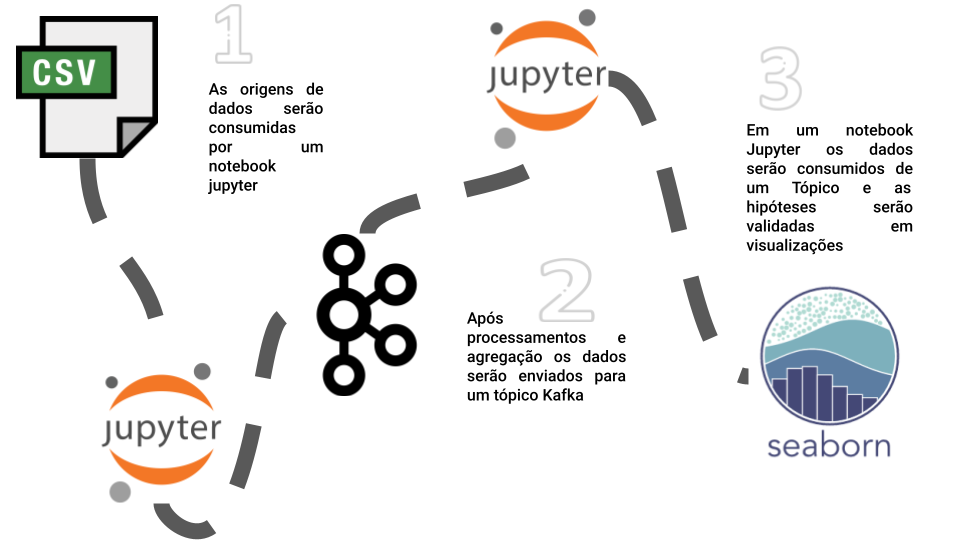

##Exporte os seus dados processados em formato .csv e importe em um software de visualização. Se possível, você também pode integrar diretamente o Apache Kafka com uma ferramenta de visualização##

Uma vez que os dados foram tratados e já se encontram disponíveis enquanto Dataframes. Os gráficos serão feitos no próprio notebook utilizando ferramentas de data visualization. No entanto, segue abaixo um trecho do código que faria a exportação dos dados em CSV, afim de consumo por outras ferramentas de dados.

In [ ]:
df_compare_ausencias.to_csv("df_compare_ausencias.csv", sheet_name='Sheet_1')
from google.colab import files
files.download("df_compare_ausencias.csv")

##Utilizando a ferramenta de visualização, crie gráficos (no mínimo dos gráficos, um de barras e um de dispersão) um suportem as suas conclusões com relação às hipóteses investigadas##

In [49]:
#import da biblioteca de plotagem de gráficos
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='avg(medprof)', ylabel='Count'>

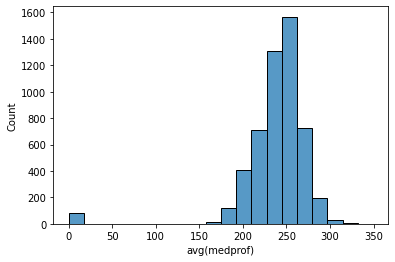

In [51]:
#Converte-se a coluna de média de notas para o valor numérico, para validar qual a distribuição das notas

df_consumer_saresp["avg(medprof)"] = pd.to_numeric(df_consumer_saresp["avg(medprof)"])
sns.histplot(df_consumer_saresp["avg(medprof)"], bins = 20)

<AxesSubplot:xlabel='avg(Formacao_Int)', ylabel='avg(medprof)'>

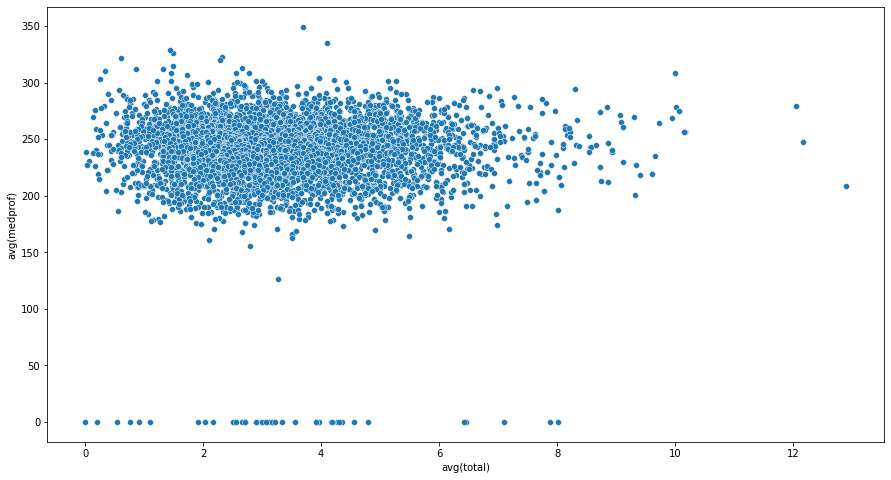

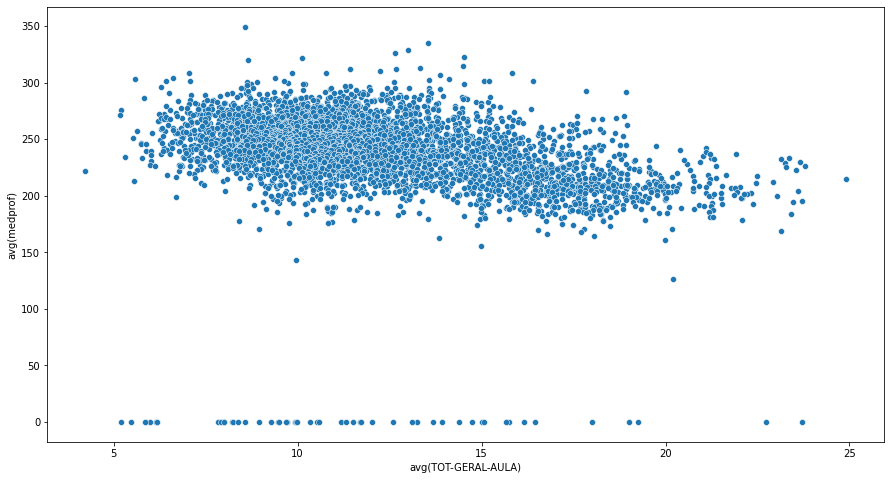

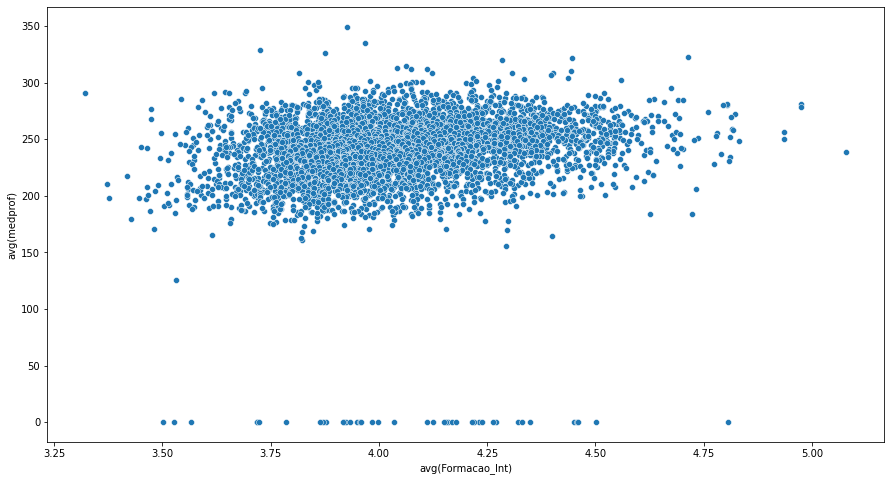

In [54]:
#Converte-se a coluna de média de faltas para o valor numérico assim como a média das notas saresp,
#para validar como elas se correlacionam
df_compare_ausencias["avg(medprof)"] = pd.to_numeric(df_compare_ausencias["avg(medprof)"])
df_compare_ausencias["avg(total)"] = pd.to_numeric(df_compare_ausencias["avg(total)"])

df_compare_ausencias = df_compare_ausencias[["avg(total)","avg(medprof)"]]
plt.figure(figsize = (15, 8))
sns.scatterplot(x = df_compare_ausencias["avg(total)"], y = df_compare_ausencias["avg(medprof)"] )

#Converte-se a coluna de média de horas-aula para o valor numérico assim como a média das notas saresp,
#para validar como elas se correlacionam
df_compare_cargahoraria["avg(medprof)"] = pd.to_numeric(df_compare_cargahoraria["avg(medprof)"])
df_compare_cargahoraria["avg(TOT-GERAL-AULA)"] = pd.to_numeric(df_compare_cargahoraria["avg(TOT-GERAL-AULA)"])

df_compare_cargahoraria = df_compare_cargahoraria[["avg(TOT-GERAL-AULA)","avg(medprof)"]]
plt.figure(figsize = (15, 8))
sns.scatterplot(x = df_compare_cargahoraria["avg(TOT-GERAL-AULA)"], y = df_compare_cargahoraria["avg(medprof)"] )

#Converte-se a coluna da escala de formação dos docentes para o valor numérico assim como a média das notas saresp,
#para validar como elas se correlacionam
df_compare_formacao["avg(medprof)"] = pd.to_numeric(df_compare_formacao["avg(medprof)"])
df_compare_formacao["avg(Formacao_Int)"] = pd.to_numeric(df_compare_formacao["avg(Formacao_Int)"])

df_compare_formacao = df_compare_formacao[["avg(Formacao_Int)","avg(medprof)"]]
plt.figure(figsize = (15, 8))
sns.scatterplot(x = df_compare_formacao["avg(Formacao_Int)"], y = df_compare_formacao["avg(medprof)"] )

##Por fim, escreva um texto em seu relatório fazendo uma análise final, tendo em vista os resultados obtidos. Responda às perguntas que fez no início do exercício e discuta se sua hipótese foi confirmada ou refutada##


Após a análise foi possível identificar um padrão nos dados mas esse padrão ainda não refletiu grande similaridade com os indicadores escolhidos. Apesar da máxima de que uma melhor formação e maior carga horária aumentariam o nível das escolas públicas foi o volume de ausências o que mais se aproximou de um indicador guia para esse entendimento, sugerindo que talvez políticas de acompanhamento dos profissionais da educação possam ser mais eficazes enquanto investimento. Ainda assim, é importante ressaltar que pelo gráfico de dispersão, se nota que não se trata de uma correlação forte.

Em uma próxima etapa do estudo, seria interessante avaliar esses indicadores a partir da conjunção de variáveis e não apenas a análise individual de cada uma, afinal,individualmente elas podem não trazer grande correlação com o resultado final mas na sua combinação essa correlação pode se tornar mais clara.
